In [144]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()  # or sns.set()
# Importing data
df = pd.read_csv('loan_data.csv')
# Verify
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Clean the data

In [145]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [146]:
# Standardize categorical variables
df['person_gender'] = df['person_gender'].str.capitalize()
df['person_education'] = df['person_education'].replace({
    'Master': "Master's",
    'Bachelor': "Bachelor's",
    'High School': 'High School'
})
df['person_home_ownership'] = df['person_home_ownership'].str.capitalize()
df['loan_intent'] = df['loan_intent'].str.capitalize()
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].str.capitalize()

In [147]:
# Correct data types
# Convert numerical columns to appropriate types
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
df[num_cols] = df[num_cols].apply(pd.to_numeric)

In [148]:
# Rename columns for clarity
df.rename(columns={
    'person_age': 'Person_Age',
    'person_gender': 'Person_Gender',
    'person_education': 'Person_Education',
    'person_income': 'Person_Income',
    'person_emp_exp': 'Person_Employment_Experience',
    'person_home_ownership': 'Person_Home_Ownership',
    'loan_amnt': 'Loan_Amount',
    'loan_intent': 'Loan_Intent',
    'loan_int_rate': 'Loan_Interest_Rate',
    'loan_percent_income': 'Loan_Percent_Income',
    'cb_person_cred_hist_length': 'Credit_History_Length',
    'credit_score': 'Credit_Score',
    'previous_loan_defaults_on_file': 'Previous_Loan_Defaults',
    'loan_status': 'Loan_Status'
}, inplace=True)

In [149]:
# Convert 'Loan_Status' from numerical to categorical
df['Loan_Status'] = df['Loan_Status'].map({1: 'Approved', 0: 'Denied'})

In [150]:
# Ensure 'Previous_Loan_Defaults' contains consistent 'Yes'/'No' values
df['Previous_Loan_Defaults'] = df['Previous_Loan_Defaults'].map({'Yes': 'Yes', 'No': 'No'})

In [151]:
# Format percentages and monetary values
df['Loan_Interest_Rate'] = df['Loan_Interest_Rate'].map('{:,.2f}%'.format)
df['Loan_Percent_Income'] = df['Loan_Percent_Income'].map('{:,.0%}'.format)
df['Person_Income'] = df['Person_Income'].map('${:,.2f}'.format)
df['Loan_Amount'] = df['Loan_Amount'].map('${:,.2f}'.format)

In [152]:
# Verify data after cleaning
df.head()

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Employment_Experience,Person_Home_Ownership,Loan_Amount,Loan_Intent,Loan_Interest_Rate,Loan_Percent_Income,Credit_History_Length,Credit_Score,Previous_Loan_Defaults,Loan_Status
0,22.0,Female,Master's,"$71,948.00",0,Rent,"$35,000.00",Personal,16.02%,49%,3.0,561,No,Approved
1,21.0,Female,High School,"$12,282.00",0,Own,"$1,000.00",Education,11.14%,8%,2.0,504,Yes,Denied
2,25.0,Female,High School,"$12,438.00",3,Mortgage,"$5,500.00",Medical,12.87%,44%,3.0,635,No,Approved
3,23.0,Female,Bachelor's,"$79,753.00",0,Rent,"$35,000.00",Medical,15.23%,44%,2.0,675,No,Approved
4,24.0,Male,Master's,"$66,135.00",1,Rent,"$35,000.00",Medical,14.27%,53%,4.0,586,No,Approved


### Lets look at education data

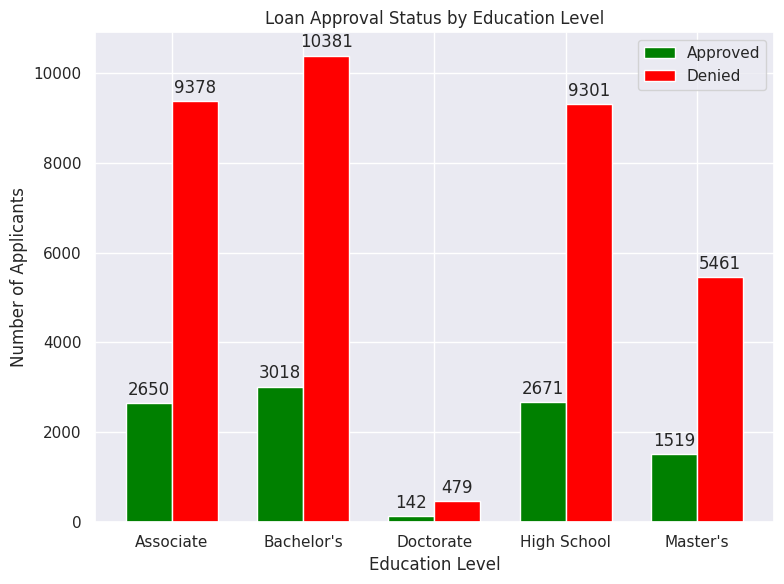

In [153]:
analysis_df = df[['Person_Education', 'Loan_Status']]
education_loan_status = analysis_df.groupby(['Person_Education', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting 
labels = education_loan_status.index
approved = education_loan_status['Approved'] if 'Approved' in education_loan_status.columns else [0]*len(labels)
denied = education_loan_status['Denied'] if 'Denied' in education_loan_status.columns else [0]*len(labels)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8,6))

# Plot bars for 'Approved' and 'Denied'
rects1 = ax.bar(x - width/2, approved, width, label='Approved', color='green')
rects2 = ax.bar(x + width/2, denied, width, label='Denied', color='red')

ax.set_xlabel('Education Level')
ax.set_ylabel('Number of Applicants')
ax.set_title('Loan Approval Status by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('graphs/education_loan_status1.png', dpi=300, bbox_inches='tight')
plt.show()


### This graph does not show the picture in a clear way. Lets look at the other way to visualize this data.

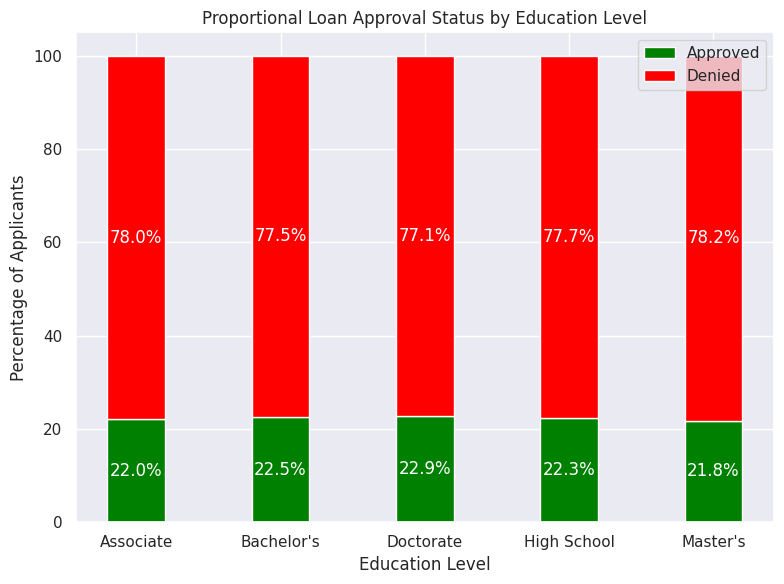

In [154]:
# Calculate percentages for each Loan_Status within each Education level
education_loan_status['Total'] = education_loan_status.sum(axis=1)
education_loan_status['Approved_Percentage'] = (education_loan_status['Approved'] / education_loan_status['Total']) * 100
education_loan_status['Denied_Percentage'] = (education_loan_status['Denied'] / education_loan_status['Total']) * 100

# Plot the proportional data
labels = education_loan_status.index
approved_percentages = education_loan_status['Approved_Percentage']
denied_percentages = education_loan_status['Denied_Percentage']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

# Create stacked bar chart for percentages
p1 = ax.bar(x, approved_percentages, width, label='Approved', color='green')
p2 = ax.bar(x, denied_percentages, width, bottom=approved_percentages, label='Denied', color='red')

# Add labels, title, and legend
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Applicants')
ax.set_title('Proportional Loan Approval Status by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate percentages
for i, (appr, deny) in enumerate(zip(approved_percentages, denied_percentages)):
    ax.text(i, appr / 2, f'{appr:.1f}%', ha='center', va='center', color='white')
    ax.text(i, appr + deny / 2, f'{deny:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/education_loan_status2.png', dpi=300, bbox_inches='tight')
plt.show()


### Let's look at income data

In [155]:
# Ensure 'Person_Income' is numeric
df['Person_Income'] = df['Person_Income'].replace('[\$,]', '', regex=True).astype(float)

# Create Income Groups
bins = [0, 20000, 40000, 60000, 80000, 100000]  # Define income ranges
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k']  # Labels for income groups
df['Income_Group'] = pd.cut(df['Person_Income'], bins=bins, labels=labels)

# Group Data by Income_Group and Loan_Status, with observed=True to suppress the warning
income_loan_status = df.groupby(['Income_Group', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

print("Grouped Data by Income:")
print(income_loan_status)

Grouped Data by Income:
Loan_Status   Approved  Denied
Income_Group                  
0-20k              637     127
20k-40k           2739    3862
40k-60k           2819    8102
60k-80k           1888    8414
80k-100k           971    5417


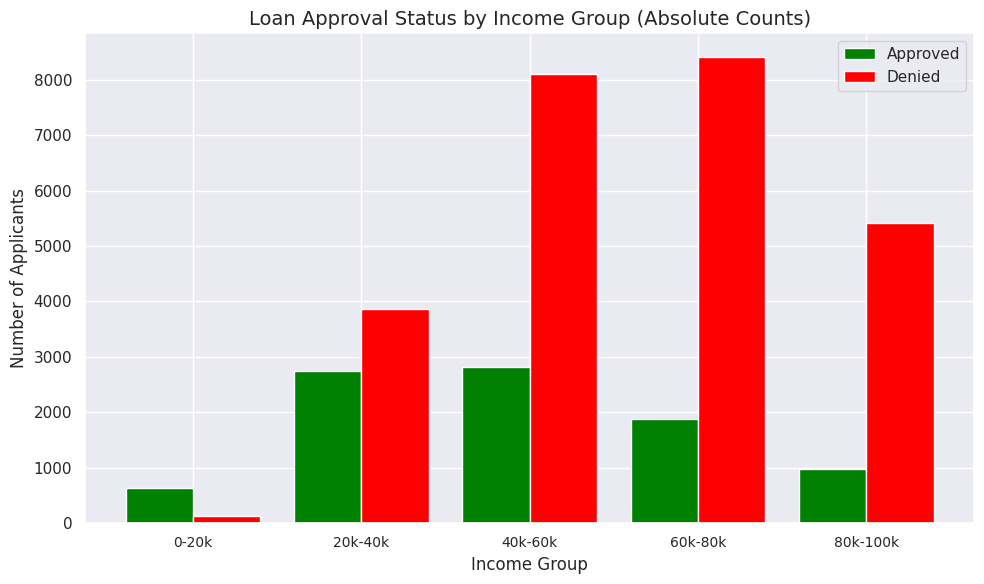

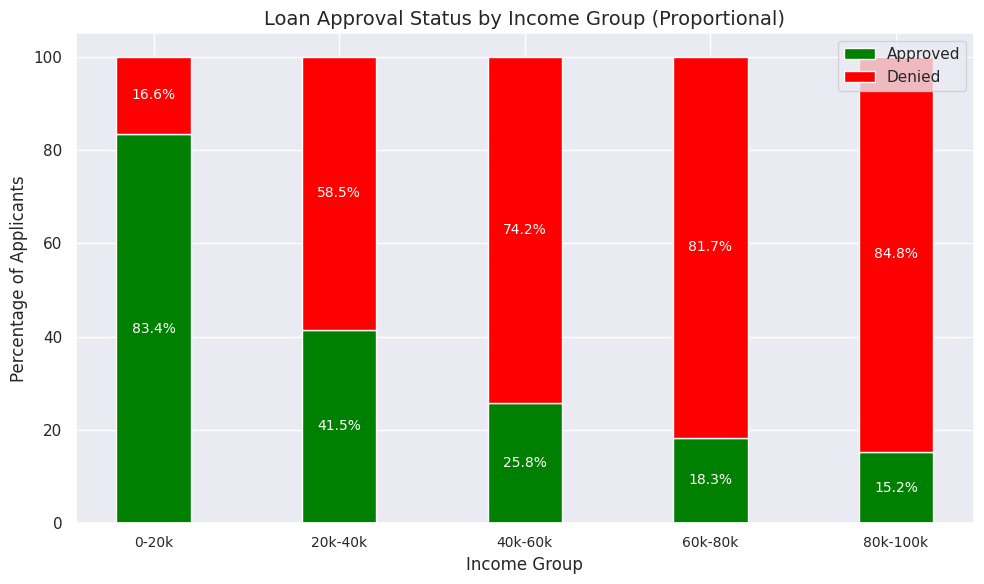

In [156]:
# Calculate totals and proportions for proportional chart
income_loan_status['Total'] = income_loan_status['Approved'] + income_loan_status['Denied']
income_loan_status['Approved_Percentage'] = (income_loan_status['Approved'] / income_loan_status['Total']) * 100
income_loan_status['Denied_Percentage'] = (income_loan_status['Denied'] / income_loan_status['Total']) * 100

# Define positions for bar plots
x = range(len(income_loan_status.index))
width = 0.4

# Absolute counts bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([pos - width/2 for pos in x], income_loan_status['Approved'], width, label='Approved', color='green')
ax.bar([pos + width/2 for pos in x], income_loan_status['Denied'], width, label='Denied', color='red')

# Customize the plot
ax.set_title('Loan Approval Status by Income Group (Absolute Counts)', fontsize=14)
ax.set_xlabel('Income Group', fontsize=12)
ax.set_ylabel('Number of Applicants', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(income_loan_status.index, fontsize=10)
ax.legend()
plt.tight_layout()
plt.savefig('graphs/income_loan_status1.png', dpi=300, bbox_inches='tight')
plt.show()

# Proportional bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, income_loan_status['Approved_Percentage'], width, label='Approved', color='green')
ax.bar(x, income_loan_status['Denied_Percentage'], width, bottom=income_loan_status['Approved_Percentage'], label='Denied', color='red')

# Customize the plot
ax.set_title('Loan Approval Status by Income Group (Proportional)', fontsize=14)
ax.set_xlabel('Income Group', fontsize=12)
ax.set_ylabel('Percentage of Applicants', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(income_loan_status.index, fontsize=10)
ax.legend()

# Annotate bars with percentages
for i, (appr, deny) in enumerate(zip(income_loan_status['Approved_Percentage'], income_loan_status['Denied_Percentage'])):
    ax.text(i, appr / 2, f'{appr:.1f}%', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, appr + deny / 2, f'{deny:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('graphs/income_loan_status2.png', dpi=300, bbox_inches='tight')
plt.show()

### Can not make any clear conclusions based on this data. Need to look at more. 

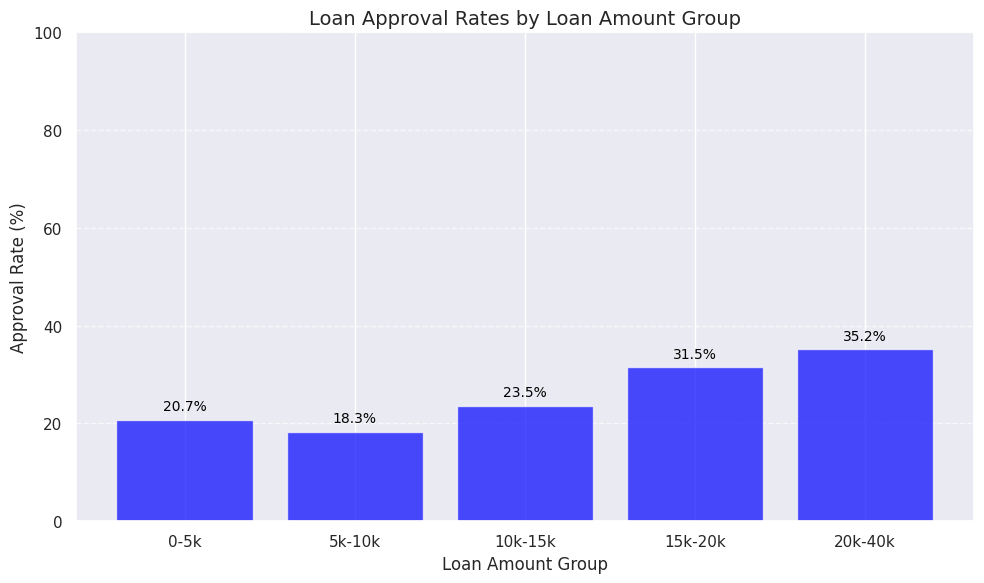

In [157]:
# Clean and convert Loan_Amount column to numeric
df['Loan_Amount'] = df['Loan_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Define bins and labels for loan amount groups
bins = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']

# Group Loan_Amount into bins
df['Loan_Amount_Group'] = pd.cut(df['Loan_Amount'], bins=bins, labels=labels)

# Remove invalid rows
df = df.dropna(subset=['Loan_Amount', 'Loan_Amount_Group'])

# Standardize 'Loan_Status' values
df['Loan_Status'] = df['Loan_Status'].str.strip().str.capitalize()

# Map 'Loan_Status' to numeric values
df['Loan_Status_Numeric'] = df['Loan_Status'].map({'Approved': 1, 'Denied': 0})

# Drop rows where 'Loan_Status_Numeric' is NaN
df = df.dropna(subset=['Loan_Status_Numeric'])

# Ensure 'Loan_Status_Numeric' is numeric
df['Loan_Status_Numeric'] = df['Loan_Status_Numeric'].astype(float)

# Calculate approval rates within each loan amount group
loan_group_analysis = df.groupby('Loan_Amount_Group', observed=True)['Loan_Status_Numeric'].mean().reset_index()
loan_group_analysis.rename(columns={'Loan_Status_Numeric': 'Approval_Rate'}, inplace=True)

# Drop NaNs in 'Approval_Rate' if any
loan_group_analysis = loan_group_analysis.dropna(subset=['Approval_Rate'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(loan_group_analysis['Loan_Amount_Group'], loan_group_analysis['Approval_Rate'] * 100, color='blue', alpha=0.7)
plt.title('Loan Approval Rates by Loan Amount Group', fontsize=14)
plt.xlabel('Loan Amount Group', fontsize=12)
plt.ylabel('Approval Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, rate in enumerate(loan_group_analysis['Approval_Rate'] * 100):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('graphs/loan_amount_group.png', dpi=300, bbox_inches='tight')
plt.show()


### We can see that loan amount is not a significant factor in determining approval status. The guess here would that the success depends not only on the amount of the loan, but also on the income of the applicant.

### Lets look at successful loans grouped for different income groups.

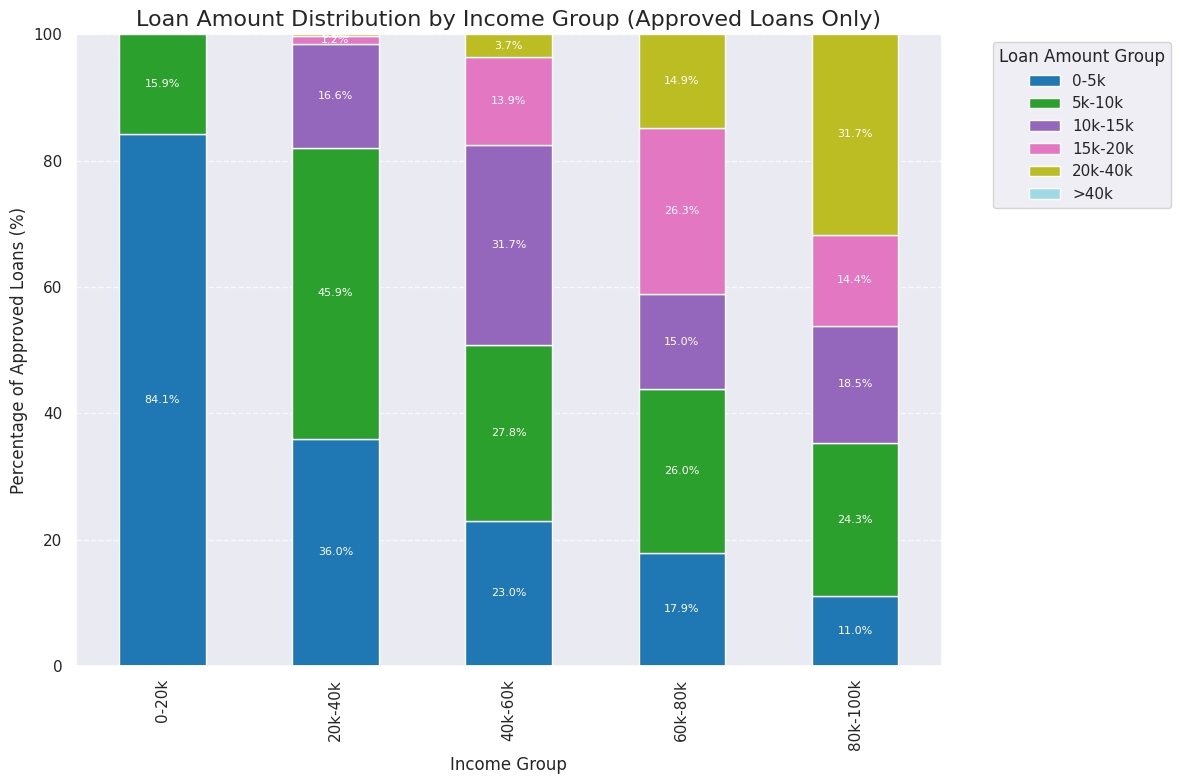

In [158]:
# Ensure 'Person_Income' is numeric
df['Person_Income'] = df['Person_Income'].replace('[\$,]', '', regex=True).astype(float)

# Ensure 'Loan_Amount' is numeric
df['Loan_Amount'] = df['Loan_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Create Income Groups
bins_income = [0, 20000, 40000, 60000, 80000, 100000]
labels_income = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k']
df['Income_Group'] = pd.cut(df['Person_Income'], bins=bins_income, labels=labels_income)

# Define bins and labels for Loan_Amount_Group
bins_loan = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
labels_loan = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']
df['Loan_Amount_Group'] = pd.cut(df['Loan_Amount'], bins=bins_loan, labels=labels_loan)

# Remove invalid rows (if any)
df_cleaned = df.dropna(subset=['Income_Group', 'Loan_Amount_Group'])

# **Filter only for plotting without modifying the original DataFrame**
df_approved = df_cleaned[df_cleaned['Loan_Status'] == 'Approved']

# Prepare data for plotting
# Create a cross-tabulation of counts with observed=True
loan_amount_distribution = df_approved.groupby(['Income_Group', 'Loan_Amount_Group'], observed=True).size().unstack(fill_value=0)

# Calculate percentages for each Income_Group
loan_amount_percentages = loan_amount_distribution.div(loan_amount_distribution.sum(axis=1), axis=0) * 100

# Reindex to ensure all loan amount groups are included
loan_amount_percentages = loan_amount_percentages.reindex(columns=labels_loan, fill_value=0)

# Plot a stacked bar chart
ax = loan_amount_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Loan Amount Distribution by Income Group (Approved Loans Only)', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage of Approved Loans (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Amount Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i in range(len(loan_amount_percentages)):
    cumulative = 0
    for loan_group in labels_loan:
        value = loan_amount_percentages.iloc[i][loan_group]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.savefig('graphs/loan_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Now we can see that it is impossible to judge the apporval rate of a loan without knowing the loan amount and the income of the applicant. But if we want to find the most successful person, we can clearly see that the person whose income is 0-20k and the loan is from 0 to 5k.

### Lets look at other qualities of a successful loan applicant.

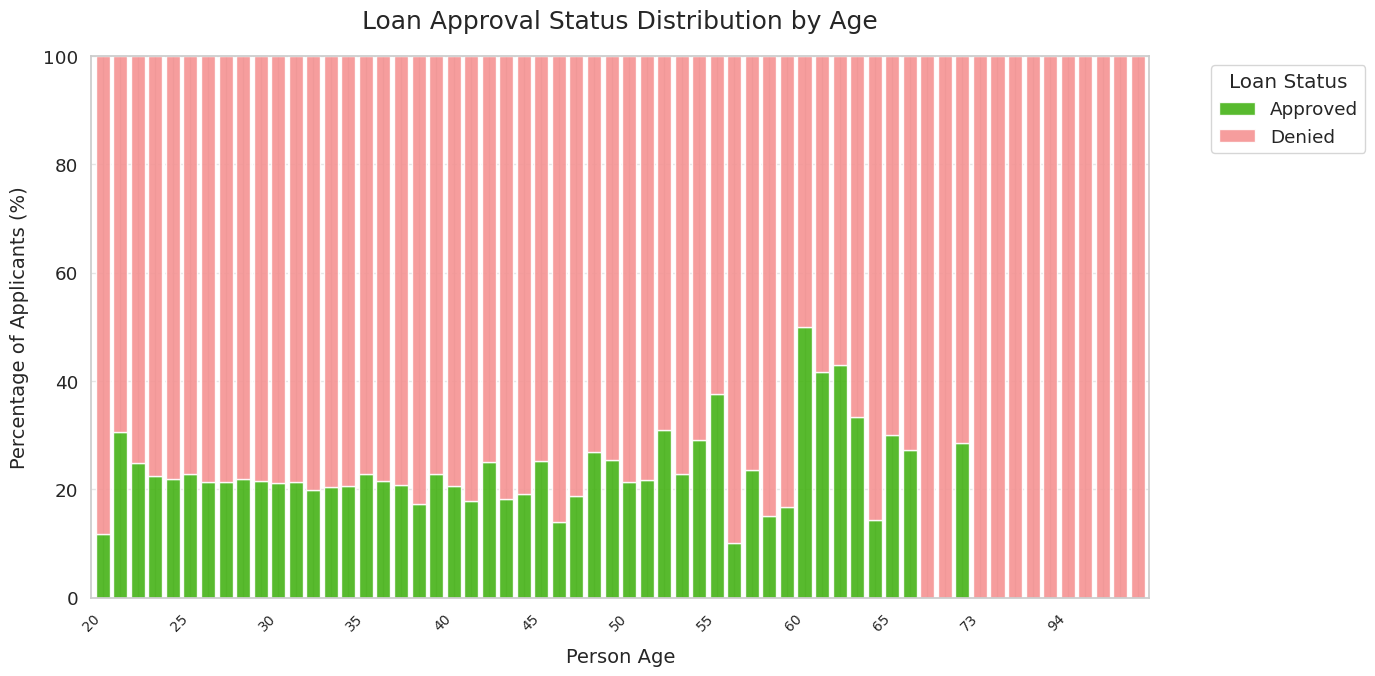

In [159]:
# Sample data preparation (adjust as needed based on your data)
df['Person_Age'] = pd.to_numeric(df['Person_Age'], errors='coerce')
df = df.dropna(subset=['Person_Age'])
df['Person_Age'] = df['Person_Age'].astype(int)

age_loan_status = df.groupby(['Person_Age', 'Loan_Status']).size().unstack(fill_value=0)
age_loan_status_percentages = age_loan_status.div(age_loan_status.sum(axis=1), axis=0) * 100

loan_status_categories = ['Approved', 'Denied']
age_loan_status_percentages = age_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Set a cleaner style with larger font scaling
sns.set_theme(style="whitegrid", font_scale=1.2)

fig, ax = plt.subplots(figsize=(14, 7))  # Wider and taller figure

colors = ['#46b317', '#f59393']
age_loan_status_percentages.plot(
    kind='bar',
    stacked=True, 
    ax=ax, 
    color=colors, 
    alpha=0.9, 
    width=0.8
)

# Set titles and labels with more space and larger font
ax.set_title('Loan Approval Status Distribution by Age', fontsize=18, pad=20)
ax.set_xlabel('Person Age', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Applicants (%)', fontsize=14, labelpad=10)

# Set y-limit and adjust grid
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show only every nth x-tick to reduce clutter
all_ticks = age_loan_status_percentages.index
show_every = 5  # Show a tick every 5 ages (adjust as needed)
visible_ticks = [tick if i % show_every == 0 else "" for i, tick in enumerate(all_ticks)]

ax.set_xticklabels(visible_ticks, rotation=45, ha='right', fontsize=10)

# Move legend outside the plot area
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)

plt.tight_layout()
plt.savefig('graphs/age_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph looks pretty even, so lets look at other variables.

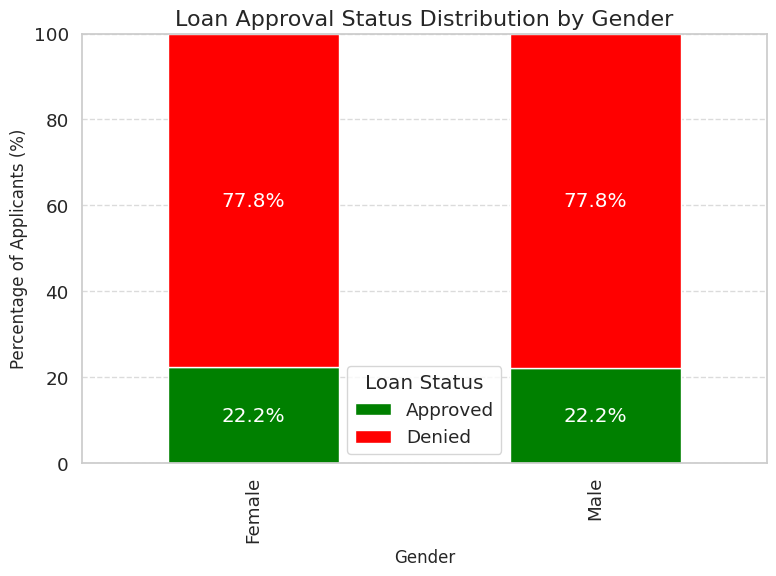

In [160]:
# Create a copy of the relevant columns to avoid modifying the original DataFrame
df_gender = df[['Person_Gender', 'Loan_Status']].copy()

# Standardize and clean the data
df_gender['Person_Gender'] = df_gender['Person_Gender'].str.strip().str.capitalize()
df_gender['Loan_Status'] = df_gender['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
gender_loan_status = df_gender.groupby(['Person_Gender', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each gender
gender_loan_status_percentages = gender_loan_status.div(gender_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
loan_status_categories = ['Approved', 'Denied']
gender_loan_status_percentages = gender_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = gender_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, gender in enumerate(gender_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = gender_loan_status_percentages.loc[gender][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/gender_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

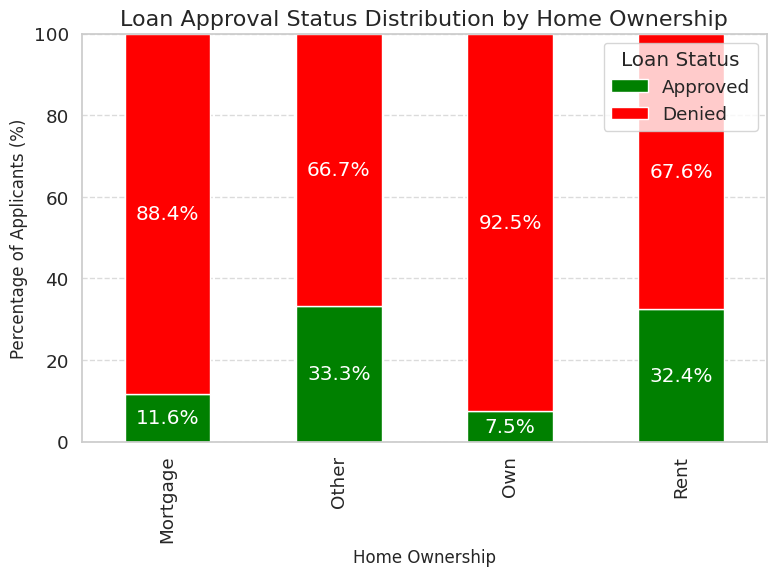

In [161]:
# Create a copy to avoid modifying the original DataFrame
df_home = df[['Person_Home_Ownership', 'Loan_Status']].copy()

# Standardize and clean the data
df_home['Person_Home_Ownership'] = df_home['Person_Home_Ownership'].str.strip().str.capitalize()
df_home['Loan_Status'] = df_home['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
home_loan_status = df_home.groupby(['Person_Home_Ownership', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each home ownership type
home_loan_status_percentages = home_loan_status.div(home_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
home_loan_status_percentages = home_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = home_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, ownership in enumerate(home_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = home_loan_status_percentages.loc[ownership][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/home_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

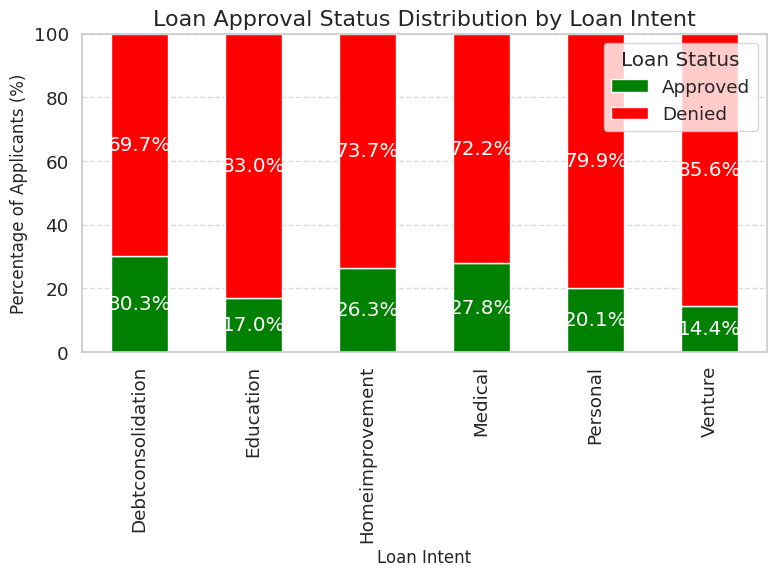

In [162]:
# Create a copy to avoid modifying the original DataFrame
df_intent = df[['Loan_Intent', 'Loan_Status']].copy()

# Standardize and clean the data
df_intent['Loan_Intent'] = df_intent['Loan_Intent'].str.strip().str.capitalize()
df_intent['Loan_Status'] = df_intent['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
intent_loan_status = df_intent.groupby(['Loan_Intent', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each loan intent
intent_loan_status_percentages = intent_loan_status.div(intent_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
intent_loan_status_percentages = intent_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = intent_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Loan Intent', fontsize=16)
plt.xlabel('Loan Intent', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, intent in enumerate(intent_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = intent_loan_status_percentages.loc[intent][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/intent_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


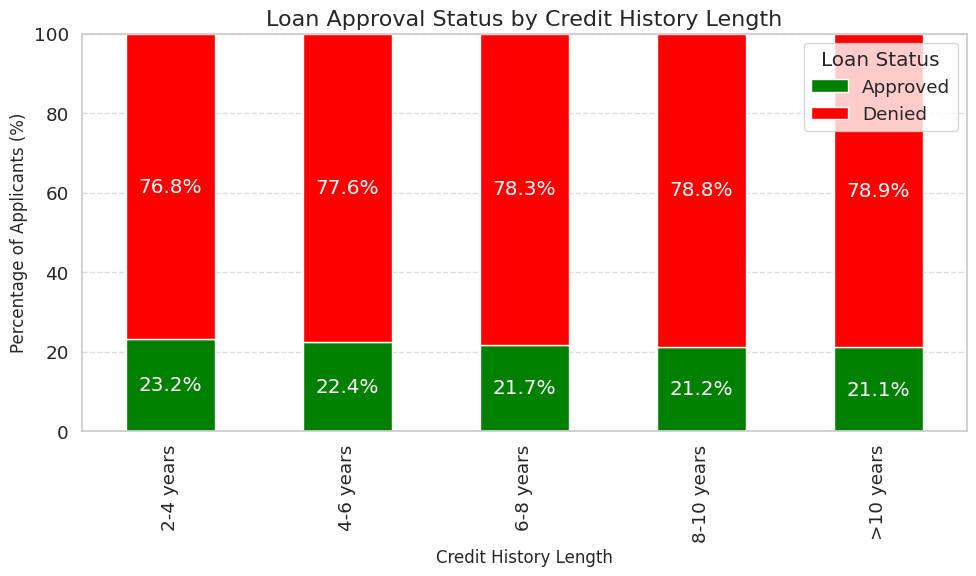

In [163]:
# Create a copy to avoid modifying the original DataFrame
df_history = df[['Credit_History_Length', 'Loan_Status']].copy()

# Ensure 'Credit_History_Length' is numeric
df_history['Credit_History_Length'] = pd.to_numeric(df_history['Credit_History_Length'], errors='coerce')

# Remove invalid rows
df_history = df_history.dropna(subset=['Credit_History_Length', 'Loan_Status'])

# Bin Credit History Length into categories
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '>10 years']
df_history['Credit_History_Group'] = pd.cut(df_history['Credit_History_Length'], bins=bins, labels=labels, right=False)

# Standardize and clean the data
df_history['Loan_Status'] = df_history['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts with observed=True to suppress the warning
history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

# Calculate percentages for each credit history group
history_loan_status_percentages = history_loan_status.div(history_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
history_loan_status_percentages = history_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = history_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit History Length', fontsize=16)
plt.xlabel('Credit History Length', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(history_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = history_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/credit_history_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

### Doesn't tell much.

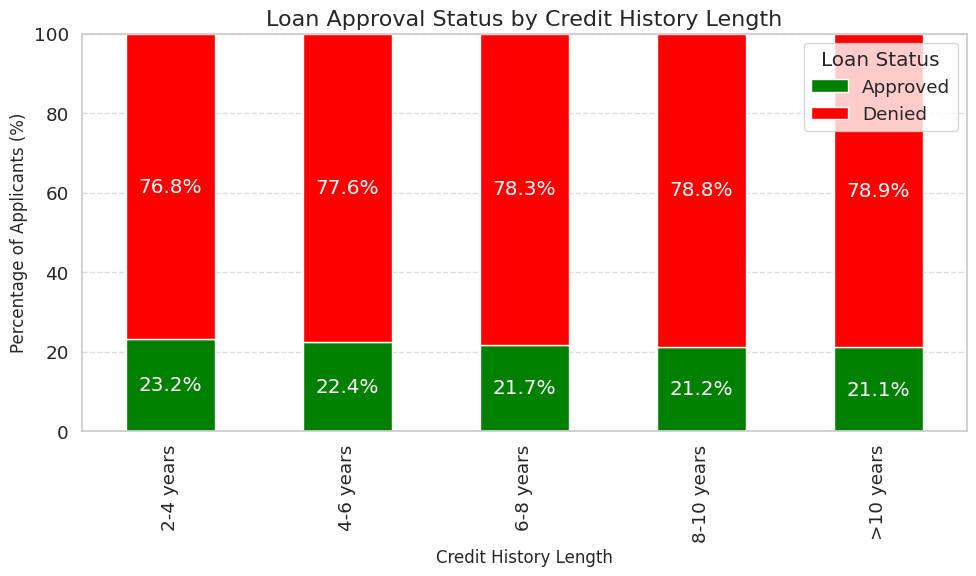

In [164]:
# Create a copy to avoid modifying the original DataFrame
df_history = df[['Credit_History_Length', 'Loan_Status']].copy()

# Ensure 'Credit_History_Length' is numeric
df_history['Credit_History_Length'] = pd.to_numeric(df_history['Credit_History_Length'], errors='coerce')

# Remove invalid rows
df_history = df_history.dropna(subset=['Credit_History_Length', 'Loan_Status'])

# Bin Credit History Length into categories
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '>10 years']
df_history['Credit_History_Group'] = pd.cut(df_history['Credit_History_Length'], bins=bins, labels=labels, right=False)

# Standardize and clean the data
df_history['Loan_Status'] = df_history['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts with observed=True to suppress the warning
history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

# Calculate percentages for each credit history group
history_loan_status_percentages = history_loan_status.div(history_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
history_loan_status_percentages = history_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = history_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit History Length', fontsize=16)
plt.xlabel('Credit History Length', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(history_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = history_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/credit_history_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

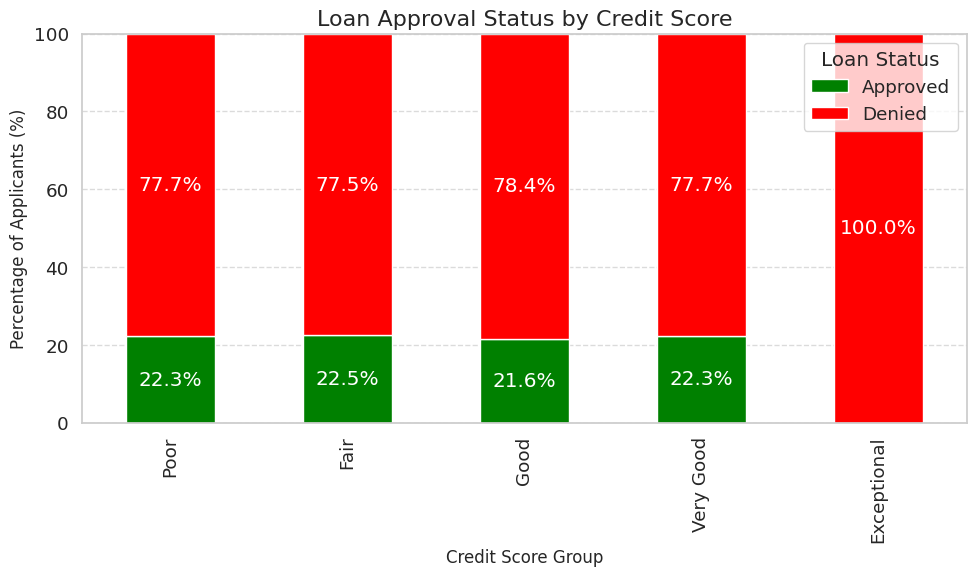

In [165]:
# Create a copy to avoid modifying the original DataFrame
df_credit_score = df[['Credit_Score', 'Loan_Status']].copy()

# Ensure 'Credit_Score' is numeric
df_credit_score['Credit_Score'] = pd.to_numeric(df_credit_score['Credit_Score'], errors='coerce')

# Remove invalid rows
df_credit_score = df_credit_score.dropna(subset=['Credit_Score', 'Loan_Status'])

# Bin Credit Score into categories
bins_credit_score = [0, 580, 670, 740, 800, float('inf')]
labels_credit_score = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
df_credit_score['Credit_Score_Group'] = pd.cut(df_credit_score['Credit_Score'], bins=bins_credit_score, labels=labels_credit_score, right=False)

# Standardize and clean the data
df_credit_score['Loan_Status'] = df_credit_score['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
credit_score_loan_status = df_credit_score.groupby(['Credit_Score_Group', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

# Calculate percentages for each credit score group
credit_score_loan_status_percentages = credit_score_loan_status.div(credit_score_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
credit_score_loan_status_percentages = credit_score_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = credit_score_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit Score', fontsize=16)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(credit_score_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = credit_score_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/credit_score_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

### This doesn't look right.

In [166]:
group_sizes = df_credit_score['Credit_Score_Group'].value_counts()
print(group_sizes)

Credit_Score_Group
Fair           26806
Good           11196
Poor            6901
Very Good         94
Exceptional        3
Name: count, dtype: int64


In [167]:
print(df[df['Credit_Score'] >= 800])

       Person_Age Person_Gender Person_Education  Person_Income  \
183           144          Male        Associate       241424.0   
575           123        Female      High School        97140.0   
32297         144        Female        Associate      7200766.0   

       Person_Employment_Experience Person_Home_Ownership  Loan_Amount  \
183                             121              Mortgage       6000.0   
575                             101                  Rent      20400.0   
32297                           124              Mortgage       5000.0   

      Loan_Intent Loan_Interest_Rate Loan_Percent_Income  \
183     Education             11.86%                  2%   
575     Education             10.25%                 21%   
32297    Personal             12.73%                  0%   

       Credit_History_Length  Credit_Score Previous_Loan_Defaults Loan_Status  \
183                      2.0           807                     No      Denied   
575                      3.0   

In [168]:
exceptional_group = df_credit_score[df_credit_score['Credit_Score_Group'] == 'Exceptional']
print(exceptional_group)

       Credit_Score Loan_Status Credit_Score_Group
183             807      Denied        Exceptional
575             805      Denied        Exceptional
32297           850      Denied        Exceptional


Upon close examination of the dataset, it has been observed that the "Exceptional" credit score group contains only three entries. This minimal sample size is insufficient to draw statistically reliable or meaningful conclusions about the loan approval status within this category. The 100% denial rate reflected in the analysis is, therefore, a consequence of the limited representation and should not be interpreted as indicative of broader trends or practices.

Given the insufficient data for this group, it is recommended that findings related to "Exceptional" credit scores be approached with caution or, preferably, omitted from any substantive analysis. Future assessments would greatly benefit from a more balanced and comprehensive dataset that includes a larger number of observations across all credit score groups.

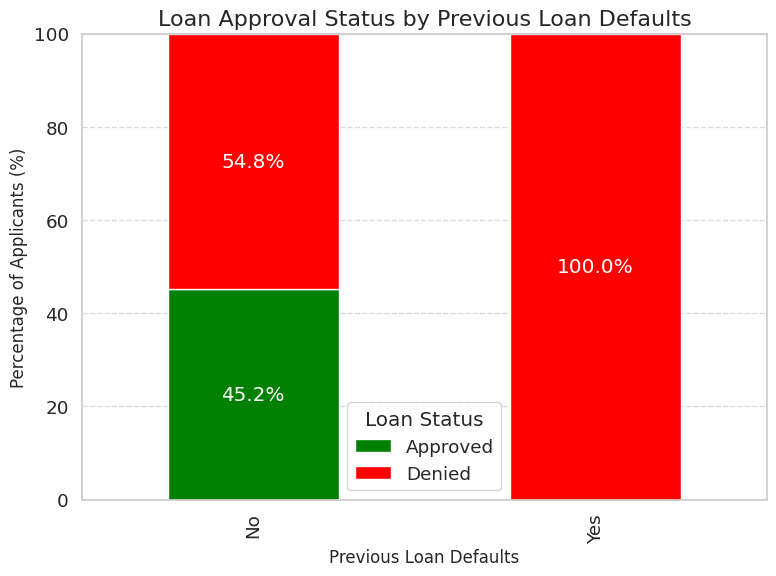

In [169]:
# Create a copy to avoid modifying the original DataFrame
df_defaults = df[['Previous_Loan_Defaults', 'Loan_Status']].copy()

# Standardize and clean the data
df_defaults['Previous_Loan_Defaults'] = df_defaults['Previous_Loan_Defaults'].str.strip().str.capitalize()
df_defaults['Loan_Status'] = df_defaults['Loan_Status'].str.strip().str.capitalize()

# Remove invalid rows
df_defaults = df_defaults.dropna(subset=['Previous_Loan_Defaults', 'Loan_Status'])

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
defaults_loan_status = df_defaults.groupby(['Previous_Loan_Defaults', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each previous loan defaults category
defaults_loan_status_percentages = defaults_loan_status.div(defaults_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
defaults_loan_status_percentages = defaults_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = defaults_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Previous Loan Defaults', fontsize=16)
plt.xlabel('Previous Loan Defaults', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(defaults_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = defaults_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/defaults_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

In [170]:
print(df_defaults.isna().sum())
print(df_defaults['Previous_Loan_Defaults'].unique())
print(df_defaults['Loan_Status'].unique())
print(defaults_loan_status)

Previous_Loan_Defaults    0
Loan_Status               0
dtype: int64
['No' 'Yes']
['Approved' 'Denied']
Loan_Status             Approved  Denied
Previous_Loan_Defaults                  
No                         10000   12142
Yes                            0   22858


)

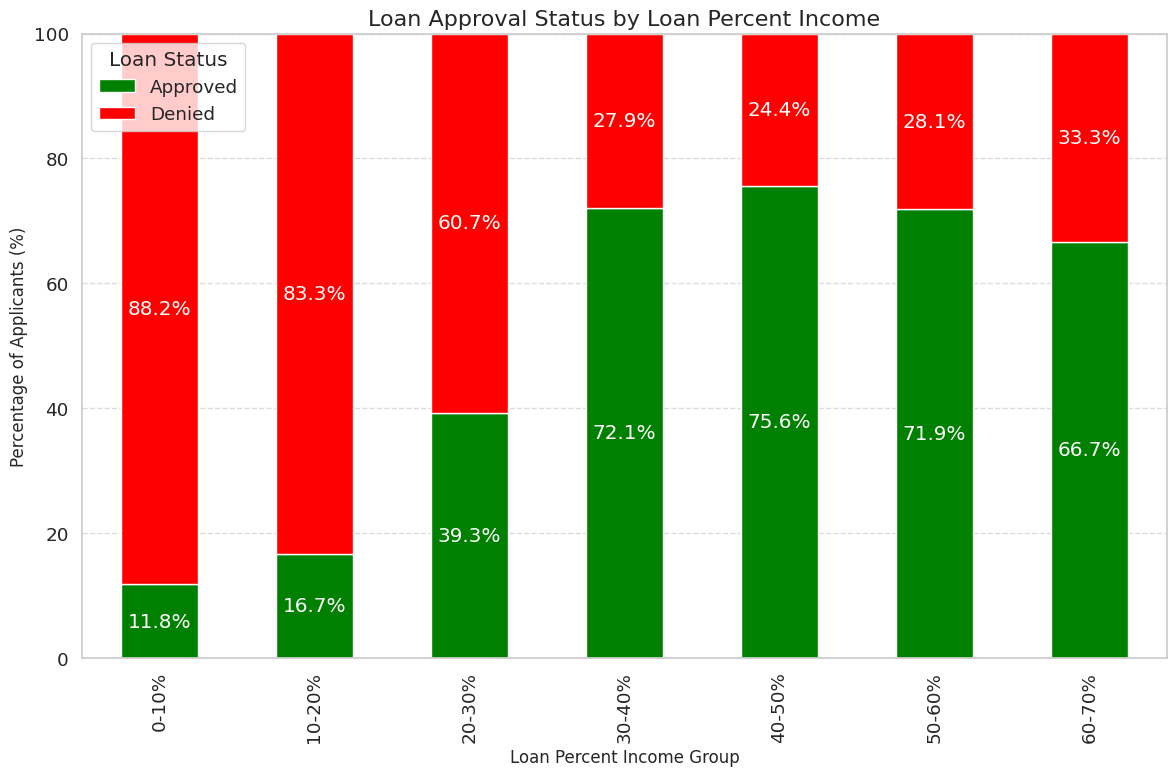

In [171]:
# Create a copy to avoid modifying the original DataFrame
df_percent_income = df[['Loan_Percent_Income', 'Loan_Status']].copy()

# Ensure 'Loan_Percent_Income' is numeric
df_percent_income['Loan_Percent_Income'] = df_percent_income['Loan_Percent_Income'].str.replace('%', '').astype(float)

# Remove invalid rows
df_percent_income = df_percent_income.dropna(subset=['Loan_Percent_Income', 'Loan_Status'])

# Bin Loan_Percent_Income into groups of 10%
bins_percent_income = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels_percent_income = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']
df_percent_income['Loan_Percent_Group'] = pd.cut(df_percent_income['Loan_Percent_Income'], bins=bins_percent_income, labels=labels_percent_income, right=False, include_lowest=True)

# Standardize and clean the data
df_percent_income['Loan_Status'] = df_percent_income['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
percent_income_loan_status = df_percent_income.groupby(['Loan_Percent_Group', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

# Calculate percentages for each Loan_Percent_Group
percent_income_loan_status_percentages = percent_income_loan_status.div(percent_income_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
percent_income_loan_status_percentages = percent_income_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = percent_income_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'red'])

plt.title('Loan Approval Status by Loan Percent Income', fontsize=16)
plt.xlabel('Loan Percent Income Group', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(percent_income_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = percent_income_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('graphs/percent_income_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

### Lets find the "perfect" person.

In [172]:
# Initialize a dictionary to store the optimal values
perfect_person = {}

# Function to calculate approval rates and get the value with the highest rate
def get_optimal_value(df, variable, bins=None, labels=None):
    temp_df = df.copy()
    if bins is not None and labels is not None:
        temp_df[variable + '_Group'] = pd.cut(temp_df[variable], bins=bins, labels=labels)
        group_var = variable + '_Group'
    else:
        group_var = variable
    # Calculate approval rates with observed=True to suppress the warning
    approval_rates = temp_df.groupby(group_var, observed=True)['Loan_Status'].apply(lambda x: (x == 'Approved').mean()).reset_index()
    approval_rates = approval_rates.dropna(subset=['Loan_Status'])
    max_rate = approval_rates['Loan_Status'].max()
    optimal_values = approval_rates[approval_rates['Loan_Status'] == max_rate][group_var].tolist()
    total_categories = temp_df[group_var].nunique()

    # If all categories have the same approval rate, it does not matter
    if approval_rates['Loan_Status'].nunique() == 1:
        return 'Does not matter'
    # If multiple optimal values exist, return them
    elif len(optimal_values) == 1:
        return optimal_values[0]
    else:
        return optimal_values

# Ensure necessary columns are in correct format
import pandas as pd

# Convert numerical columns
numerical_cols = ['Person_Age', 'Person_Income', 'Person_Employment_Experience', 'Loan_Amount',
                  'Loan_Interest_Rate', 'Loan_Percent_Income', 'Credit_History_Length', 'Credit_Score']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[\$,%,]', '', regex=True), errors='coerce')

# Standardize categorical variables
categorical_vars = ['Person_Gender', 'Person_Education', 'Person_Home_Ownership',
                    'Loan_Intent', 'Previous_Loan_Defaults', 'Loan_Status']
for var in categorical_vars:
    df[var] = df[var].astype(str).str.strip().str.capitalize()

# Remove rows with missing Loan_Status
df = df.dropna(subset=['Loan_Status'])

# Person Age (Binned)
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65+']
perfect_person['Person_Age'] = get_optimal_value(df, 'Person_Age', bins=age_bins, labels=age_labels)

# Person Gender
perfect_person['Person_Gender'] = get_optimal_value(df, 'Person_Gender')

# Person Education
perfect_person['Person_Education'] = get_optimal_value(df, 'Person_Education')

# Person Income (Binned)
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
perfect_person['Person_Income'] = get_optimal_value(df, 'Person_Income', bins=income_bins, labels=income_labels)

# Person Employment Experience (Binned)
experience_bins = [0, 2, 5, 10, 20, float('inf')]
experience_labels = ['0-1', '2-4', '5-9', '10-19', '20+']
perfect_person['Person_Employment_Experience'] = get_optimal_value(df, 'Person_Employment_Experience', bins=experience_bins, labels=experience_labels)

# Person Home Ownership
perfect_person['Person_Home_Ownership'] = get_optimal_value(df, 'Person_Home_Ownership')

# Loan Amount (Binned)
loan_amount_bins = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
loan_amount_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']
perfect_person['Loan_Amount'] = get_optimal_value(df, 'Loan_Amount', bins=loan_amount_bins, labels=loan_amount_labels)

# Loan Intent
perfect_person['Loan_Intent'] = get_optimal_value(df, 'Loan_Intent')

# Loan Interest Rate (Binned)
interest_bins = [0, 5, 10, 15, 20, 25, float('inf')]
interest_labels = ['0-4%', '5-9%', '10-14%', '15-19%', '20-24%', '25%+']
perfect_person['Loan_Interest_Rate'] = get_optimal_value(df, 'Loan_Interest_Rate', bins=interest_bins, labels=interest_labels)

# Loan Percent Income (Binned)
percent_income_bins = [0, 20, 40, 60, 80, 100, float('inf')]
percent_income_labels = ['0-19%', '20-39%', '40-59%', '60-79%', '80-99%', '100%+']
perfect_person['Loan_Percent_Income'] = get_optimal_value(df, 'Loan_Percent_Income', bins=percent_income_bins, labels=percent_income_labels)

# Credit History Length (Binned)
history_bins = [0, 2, 4, 6, 8, 10, float('inf')]
history_labels = ['0-1 yrs', '2-3 yrs', '4-5 yrs', '6-7 yrs', '8-9 yrs', '10+ yrs']
perfect_person['Credit_History_Length'] = get_optimal_value(df, 'Credit_History_Length', bins=history_bins, labels=history_labels)

# Credit Score (Binned)
credit_score_bins = [0, 580, 670, 740, 800, float('inf')]
credit_score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
perfect_person['Credit_Score'] = get_optimal_value(df, 'Credit_Score', bins=credit_score_bins, labels=credit_score_labels)

# Previous Loan Defaults
perfect_person['Previous_Loan_Defaults'] = get_optimal_value(df, 'Previous_Loan_Defaults')

# Print the parameters of the "perfect" person
print("Parameters of the 'Perfect' Person for Loan Approval:")
for key, value in perfect_person.items():
    if isinstance(value, list):
        print(f"{key}: {', '.join(map(str, value))}")
    else:
        print(f"{key}: {value}")

Parameters of the 'Perfect' Person for Loan Approval:
Person_Age: 55-64
Person_Gender: Female
Person_Education: Doctorate
Person_Income: 0-20k
Person_Employment_Experience: 0-1
Person_Home_Ownership: Other
Loan_Amount: 20k-40k
Loan_Intent: Debtconsolidation
Loan_Interest_Rate: 15-19%
Loan_Percent_Income: 40-59%
Credit_History_Length: 0-1 yrs
Credit_Score: Fair
Previous_Loan_Defaults: No


Feature Importances (%):
                         Feature  Importance_Percent
5            Loan_Percent_Income           28.291813
4             Loan_Interest_Rate           23.879515
12        Previous_Loan_Defaults           15.318941
1                  Person_Income            9.300103
3                    Loan_Amount            7.350707
10         Person_Home_Ownership            7.270197
11                   Loan_Intent            4.010351
0                     Person_Age            1.457389
2   Person_Employment_Experience            1.389852
6          Credit_History_Length            1.007663
7                   Credit_Score            0.518842
9               Person_Education            0.188792
8                  Person_Gender            0.015833


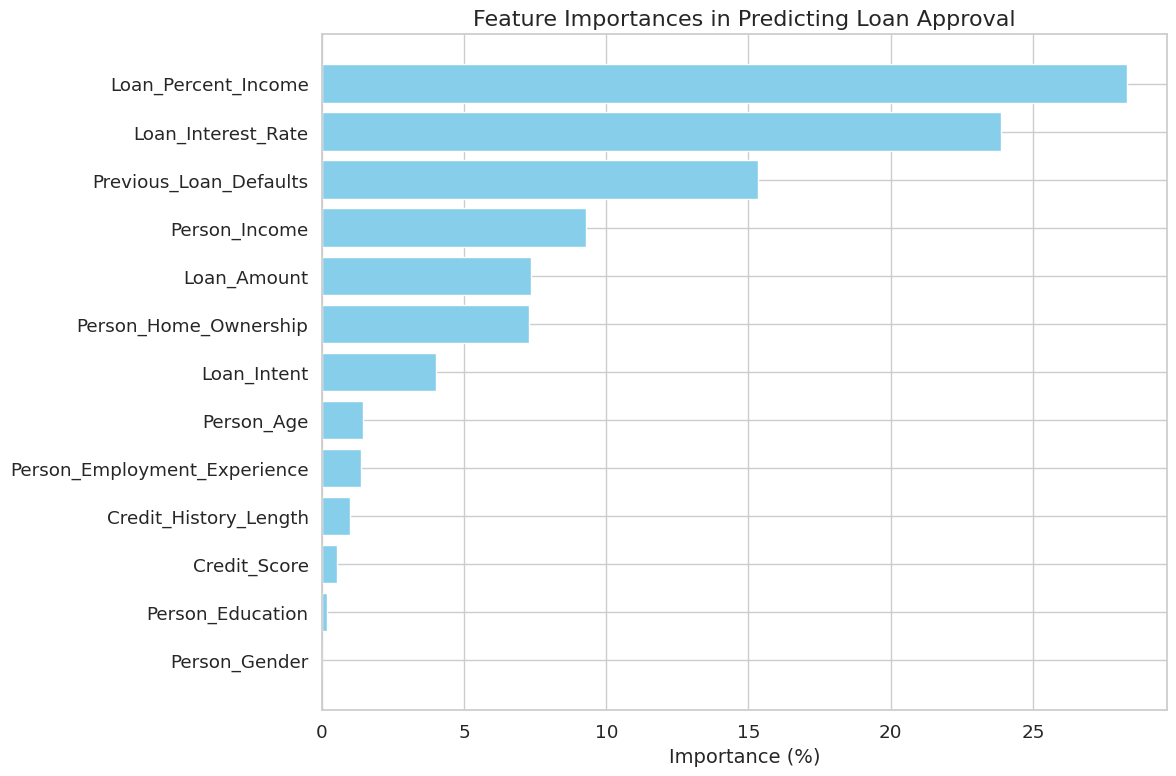

In [173]:
# Step 1: Data Preparation

# List of numerical and categorical columns
numerical_cols = ['Person_Age', 'Person_Income', 'Person_Employment_Experience',
                  'Loan_Amount', 'Loan_Interest_Rate', 'Loan_Percent_Income',
                  'Credit_History_Length', 'Credit_Score']
categorical_cols = ['Person_Gender', 'Person_Education', 'Person_Home_Ownership',
                    'Loan_Intent', 'Previous_Loan_Defaults']

# Convert numerical columns
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[\$,%,]', '', regex=True), errors='coerce')

# Standardize categorical variables
for var in categorical_cols + ['Loan_Status']:
    df[var] = df[var].astype(str).str.strip().str.capitalize()

# Remove rows with missing Loan_Status
df = df.dropna(subset=['Loan_Status'])

# Map Loan_Status to binary values
df['Loan_Status_Numeric'] = df['Loan_Status'].map({'Approved': 1, 'Denied': 0})

# Remove rows with missing Loan_Status_Numeric
df = df.dropna(subset=['Loan_Status_Numeric'])

# Step 2: Define Functions for Effect Size Calculations

# Function to compute Cohen's d for numerical variables
def cohen_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    if n1 < 2 or n2 < 2:
        return 0  # Not enough data to compute effect size
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
    s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    if s_pooled == 0:
        return 0  # Avoid division by zero
    d = (np.mean(x1) - np.mean(x2)) / s_pooled
    return abs(d)

# Function to compute Cramér's V for categorical variables
def cramers_v(confusion_matrix):
    chi2 = chi2_stat(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    denominator = min(k - 1, r - 1)
    if denominator == 0:
        return 1.0  # Maximum possible value when degrees of freedom is zero
    else:
        return np.sqrt(phi2 / denominator)

def chi2_stat(confusion_matrix):
    expected = np.outer(confusion_matrix.sum(axis=1), confusion_matrix.sum(axis=0)) / confusion_matrix.sum()
    with np.errstate(divide='ignore', invalid='ignore'):
        chi2 = ((confusion_matrix - expected) ** 2) / expected
        chi2 = np.nan_to_num(chi2)  # Replace nan with zero
    return chi2.sum()

# Step 3: Calculate Effect Sizes

effect_sizes_num = []

# For numerical variables
for col in numerical_cols:
    df_col = df[[col, 'Loan_Status_Numeric']].dropna()
    approved = df_col[df_col['Loan_Status_Numeric'] == 1][col]
    denied = df_col[df_col['Loan_Status_Numeric'] == 0][col]
    if len(approved) > 1 and len(denied) > 1:
        d = cohen_d(approved, denied)
        effect_sizes_num.append({'Feature': col, 'Effect_Size': d})
    else:
        effect_sizes_num.append({'Feature': col, 'Effect_Size': 0})

effect_sizes_cat = []

# For categorical variables
for col in categorical_cols:
    df_col = df[[col, 'Loan_Status_Numeric']].dropna()
    contingency_table = pd.crosstab(df_col[col], df_col['Loan_Status_Numeric'])
    try:
        v = cramers_v(contingency_table.values)
        effect_sizes_cat.append({'Feature': col, 'Effect_Size': v})
    except Exception as e:
        print(f"Error computing Cramér's V for {col}: {e}")
        effect_sizes_cat.append({'Feature': col, 'Effect_Size': 0})

# Combine the effect sizes
effect_sizes = effect_sizes_num + effect_sizes_cat

# Step 4: Normalize Effect Sizes to Compute Importances

importance_df = pd.DataFrame(effect_sizes)

# Normalize the effect sizes to sum up to 100%
total_effect = importance_df['Effect_Size'].sum()
importance_df['Importance_Percent'] = 100 * importance_df['Effect_Size'] / total_effect if total_effect > 0 else 0

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance_Percent', ascending=False)

# Step 5: Display Feature Importances

print("Feature Importances (%):")
print(importance_df[['Feature', 'Importance_Percent']])

# Step 6: Visualize the Feature Importances

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance_Percent'], color='skyblue')
plt.xlabel('Importance (%)', fontsize=14)
plt.title('Feature Importances in Predicting Loan Approval', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.savefig('graphs/loan_approval_importances.png', dpi=300, bbox_inches='tight')
plt.show()